In [3]:
import pandas as pd

data = {
    'Nome': ['João', 'Maria', 'Pedro', 'Ana', 'Luiz'],
    'Idade': [25, 30, 22, 28, 35],
    'Cargo': ['Analista', 'Gerente', 'Analista', 'Coordenador', 'Gerente'],
    'Salário': [3500, 5000, 3200, 4800, 5500],
    'Departamento': ['RH', 'Vendas', 'RH', 'TI', 'Vendas']
}

df = pd.DataFrame(data)
df


,Nome,Idade,Cargo,Salário,Departamento
0,João,25,Analista,3500,RH
1,Maria,30,Gerente,5000,Vendas
2,Pedro,22,Analista,3200,RH
3,Ana,28,Coordenador,4800,TI
4,Luiz,35,Gerente,5500,Vendas


Questão 1: Quais são os **nomes e cargos dos funcionários** que têm salário maior ou igual a 5000?

**Aqui podemos realizar uma filtragem simples com o loc ou com condição lógica para os salários iguais ou maiores que 5000**

In [9]:
# Filtragem com o loc
maior_5000_loc = df.loc[df["Salário"] >= 5000]
maior_5000_loc

# Filtragem com condição lógica
maior_5000 = df[df["Salário"] >= 5000]
maior_5000

,Nome,Idade,Cargo,Salário,Departamento
1,Maria,30,Gerente,5000,Vendas
4,Luiz,35,Gerente,5500,Vendas


Questão 2: **Quantos** funcionários com idade entre 25 e 30 anos trabalham no departamento de RH?

In [36]:

Funcionarios_RH = df.loc[(df["Idade"]>=25) & (df["Idade"]<=30) & (df["Departamento"]=="RH")]
Funcionarios_RH

Funcionarios_RH = df.loc[(df["Departamento"] == "RH")]
Funcionarios_RH["Nome"].count()

2

Questão 3: Qual é o **salário médio** dos gerentes no departamento de Vendas?

In [40]:
Salario_Medio = df.loc[(df["Departamento"] == "Vendas")]
Salario_Medio["Salário"].mean()

5250.0

**<h2> Exercicios de análise de dados </h2>**

In [1]:
import pandas as pd
import numpy as np

# Crie um DataFrame de exemplo com dados fictícios de vendas
data = {
    'Data': pd.date_range(start='2023-01-01', periods=100),
    'Loja': np.random.choice(['Norte-Shopping', 'Nova-America', 'Barra-Shopping'], size=100),
    'Produto': np.random.choice(['X', 'Y', 'Z'], size=100),
    'Vendas': np.random.randint(1, 100, size=100),
    'Desconto': np.random.uniform(0, 0.3, size=100)
}

df = pd.DataFrame(data)
df

,Data,Loja,Produto,Vendas,Desconto
0,2023-01-01,Nova-America,Z,74,0.189964
1,2023-01-02,Nova-America,X,87,0.259027
2,2023-01-03,Barra-Shopping,X,62,0.279607
3,2023-01-04,Nova-America,Y,14,0.299841
4,2023-01-05,Norte-Shopping,X,10,0.163121
...,...,...,...,...,...
95,2023-04-06,Barra-Shopping,Z,86,0.000047
96,2023-04-07,Barra-Shopping,X,25,0.160528
97,2023-04-08,Nova-America,Y,89,0.048460
98,2023-04-09,Barra-Shopping,Y,91,0.293886


**Como você calcularia a média das vendas mensais para cada loja?**

Como temos que calcular a média mensal, precisamos primeira selecionar as datas pelos meses.

In [2]:
# criando uma coluna para os meses
df["mês"] = df["Data"].dt.month
df

,Data,Loja,Produto,Vendas,Desconto,mês
0,2023-01-01,Nova-America,Z,74,0.189964,1
1,2023-01-02,Nova-America,X,87,0.259027,1
2,2023-01-03,Barra-Shopping,X,62,0.279607,1
3,2023-01-04,Nova-America,Y,14,0.299841,1
4,2023-01-05,Norte-Shopping,X,10,0.163121,1
...,...,...,...,...,...,...
95,2023-04-06,Barra-Shopping,Z,86,0.000047,4
96,2023-04-07,Barra-Shopping,X,25,0.160528,4
97,2023-04-08,Nova-America,Y,89,0.048460,4
98,2023-04-09,Barra-Shopping,Y,91,0.293886,4


In [12]:
media_mensal = df.groupby(["mês","Loja"])["Vendas"].mean()
media_mensal

mês  Loja          
1    Barra-Shopping    33.500000
     Norte-Shopping    45.285714
     Nova-America      55.538462
2    Barra-Shopping    58.090909
     Norte-Shopping    50.181818
     Nova-America      52.166667
3    Barra-Shopping    58.700000
     Norte-Shopping    51.384615
     Nova-America      64.500000
4    Barra-Shopping    50.500000
     Nova-America      65.250000
Name: Vendas, dtype: float64

In [56]:
media_mensal = df[["Vendas", "mês", "Loja"]]
media_mensal.groupby(["Loja"])["Vendas"].mean()

Loja
Barra-Shopping    53.645161
Norte-Shopping    48.789474
Nova-America      58.451613
Name: Vendas, dtype: float64

In [57]:
media_mensal.groupby(["Loja"])["Vendas"].mean()

Loja
Barra-Shopping    53.645161
Norte-Shopping    48.789474
Nova-America      58.451613
Name: Vendas, dtype: float64

Qual foi a loja que teve o maior valor de vendas em um único mês?

In [66]:
vendas_janeiro = media_mensal[media_mensal["mês"]==1]
vendas_janeiro

,Vendas,mês,Loja
0,74,1,Nova-America
1,87,1,Nova-America
2,62,1,Barra-Shopping
3,14,1,Nova-America
4,10,1,Norte-Shopping
5,60,1,Nova-America
6,34,1,Nova-America
7,11,1,Norte-Shopping
8,82,1,Nova-America
9,21,1,Norte-Shopping


In [65]:
vendas_janeiro.groupby(["mês","Loja"])["Vendas"].max().sort_values(ascending=False)

mês  Loja          
1    Norte-Shopping    94
     Nova-America      90
     Barra-Shopping    69
Name: Vendas, dtype: int32

Qual foi o mês com o menor valor total de vendas?

In [74]:
menor_mes = media_mensal.groupby(["mês"])["Vendas"].sum().sort_values()
menor_mes


mês
4     564
1    1490
2    1504
3    1771
Name: Vendas, dtype: int32

Como você filtraria apenas as vendas com desconto superior a 20%?

In [30]:
desconto_20 = df.loc[df["Desconto"]>0.20]
desconto_20

desconto_20 = df[df["Desconto"]>0.20]
desconto_20

,Data,Loja,Produto,Vendas,Desconto,mês
1,2023-01-02,Nova-America,X,87,0.259027,1
2,2023-01-03,Barra-Shopping,X,62,0.279607,1
3,2023-01-04,Nova-America,Y,14,0.299841,1
5,2023-01-06,Nova-America,Z,60,0.267108,1
13,2023-01-14,Barra-Shopping,X,2,0.245306,1
20,2023-01-21,Nova-America,Z,78,0.267662,1
21,2023-01-22,Norte-Shopping,Z,82,0.272192,1
31,2023-02-01,Norte-Shopping,Z,79,0.220425,2
34,2023-02-04,Norte-Shopping,Z,81,0.204092,2
36,2023-02-06,Nova-America,Z,35,0.260060,2


Como você calcularia as estatísticas resumidas (soma, média e máximo) para cada loja?

In [39]:
estatisticas_loja = df.groupby([df["Loja"]]).agg({
    'Vendas': ['sum', 'mean', 'max'],
    'Desconto': 'mean'
}).reset_index()

estatisticas_loja

Loja Vendas                 Desconto
                     sum       mean max      mean
0  Barra-Shopping   1663  53.645161  94  0.141961
1  Norte-Shopping   1854  48.789474  99  0.147924
2    Nova-America   1812  58.451613  98  0.156227

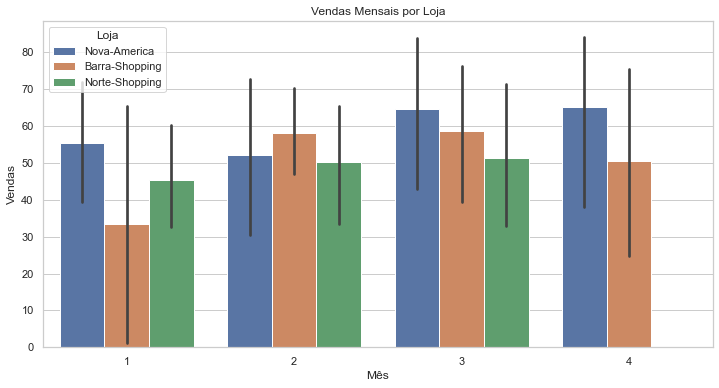

In [41]:
# 4. Criar um gráfico de barras das vendas mensais por loja
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
plot = sns.barplot(x="mês", y="Vendas", hue="Loja", data=df)
plt.title('Vendas Mensais por Loja')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.show()